## Jupyter notebook for presenting heatmap for ATAC-seq time course data
This notebook is the code for generating heatmap (Fig. 3a) of the ATAC-seq time course data used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:
library(ggplot2)
library(reshape2)


### read the data

In [2]:
data <- read.table('data/ATACseq_withcluster.txt')

In [3]:
head(data)

V1,V2,V3,V4,V5,V6,V7
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-0.793143,-1.136639,-0.724176,-0.005280,1.426419,1.232820,0
1.782485,-0.166977,-0.113805,-0.501415,-1.507668,0.507379,5
0.880453,1.202158,0.420727,0.047737,-0.859401,-1.691674,3
-1.121728,-1.585049,0.848825,0.841859,0.884804,0.131290,0
-1.245967,0.926765,1.279408,0.657014,-0.482710,-1.134510,1
1.489308,-1.095060,-0.912041,-0.275222,-0.428358,1.221373,5


In [4]:
names(data) <- c('T0','T20','T1H','T2H','T4H','T24H','cluster')

### get ATAC-seq data for each cluster

In [5]:
data_cluster0 <- subset(data, data$cluster %in% 0)
data_cluster1 <- subset(data, data$cluster %in% 1)
data_cluster2 <- subset(data, data$cluster %in% 2)
data_cluster3 <- subset(data, data$cluster %in% 3)
data_cluster4 <- subset(data, data$cluster %in% 4)
data_cluster5 <- subset(data, data$cluster %in% 5)


### order data by their cluster and mass across the time

In [6]:
tmp <- data_cluster0[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster0$mass <- max_mass
data_cluster0$idx_mass <- idx_max_mass
cluster0_new <- data_cluster0[with(data_cluster0, order(idx_mass, mass)),]
tmp <- data_cluster1[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster1$mass <- max_mass
data_cluster1$idx_mass <- idx_max_mass
cluster1_new <- data_cluster1[with(data_cluster1, order(idx_mass, mass)),]

tmp <- data_cluster2[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster2$mass <- max_mass
data_cluster2$idx_mass <- idx_max_mass
cluster2_new <- data_cluster2[with(data_cluster2, order(idx_mass, mass)),]

tmp <- data_cluster3[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster3$mass <- max_mass
data_cluster3$idx_mass <- idx_max_mass
cluster3_new <- data_cluster3[with(data_cluster3, order(idx_mass, mass)),]

tmp <- data_cluster4[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster4$mass <- max_mass
data_cluster4$idx_mass <- idx_max_mass
cluster4_new <- data_cluster4[with(data_cluster4, order(idx_mass, mass)),]

tmp <- data_cluster5[,1:6]
max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, max)
idx_max_mass <- apply(cbind((tmp[,1] + tmp[,2]), (tmp[,2] + tmp[,3]), (tmp[,3] + tmp[,4]), 
    (tmp[,4] + tmp[,5]), (tmp[,5] + tmp[,6])), 1, which.max)
data_cluster5$mass <- max_mass
data_cluster5$idx_mass <- idx_max_mass
cluster5_new <- data_cluster5[with(data_cluster5, order(idx_mass, mass)),]


In [7]:
atacseq_new <- rbind(cluster2_new, cluster3_new, cluster5_new, cluster0_new, cluster1_new, cluster4_new)

In [8]:
atacseq_new$extra <- sapply(seq.int(dim(atacseq_new)[1]), function(i) atacseq_new[i,atacseq_new$idx_mass[i]+3])

In [9]:
atacseq_new_sorted <- atacseq_new[with(atacseq_new, order(idx_mass,-extra/mass)),]

### plot the results

In [10]:
atacseq_new_sorted$pos <- 1:dim(atacseq_new_sorted)[1]
data_tmp <- atacseq_new_sorted[,c('T0','T20','T1H','T2H','T4H','T24H','pos')]
melted_data <- melt(data_tmp, id.vars='pos')


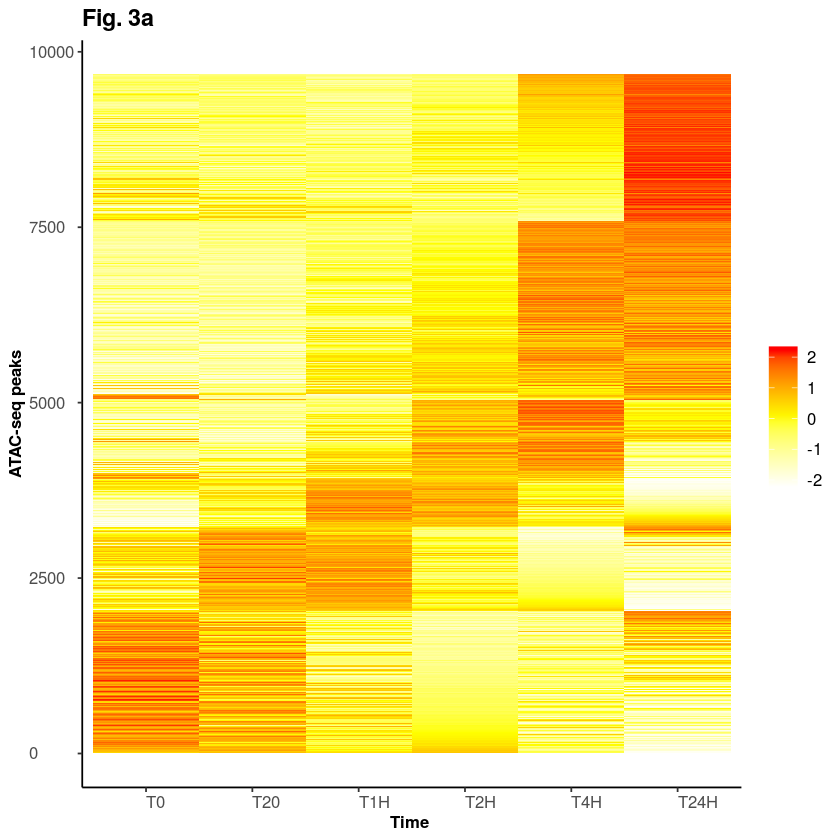

In [11]:
ggplot(data=melted_data, aes(variable, pos, fill=value)) +
  geom_tile(size=0.05) + 
  scale_fill_gradient2(low = "white", mid="yellow", high = "red") +
  xlab("Time ") +
  ylab("ATAC-seq peaks") +
  theme(panel.background=element_blank(),
        legend.title = element_blank(),
        legend.text = element_text(size = 10),
        legend.position='right',
        plot.title = element_text(size=14, face="bold", vjust=1.1),
        axis.title=element_text(size=10,face="bold"),
        axis.text.x = element_text(angle = 0, hjust = 0, size=10),
        axis.text.y = element_text(angle = 0, hjust = 0, size=10),
        axis.line = element_line()) +
  labs(fill = "Value") + ggtitle('Fig. 3a')
